<a href="https://colab.research.google.com/github/tobyzawthuhtet/deep-learning-/blob/main/Deep_Neural_network_for_Crop_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Importing Mendatory Libraries***



In [470]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Reading CSV data 


In [471]:
df1 = pd.read_csv('/content/sample_data/tf_data.csv')
df = pd.read_csv('/content/sample_data/rastervalue_ANN.csv')
df1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Assam,BAKSA,2011,Autumn,Paddy,10325,14340
1,Assam,BAKSA,2011,Summer,Paddy,2500,5595
2,Assam,BAKSA,2011,Winter,Paddy,85450,153149
3,Assam,BAKSA,2012,Autumn,Paddy,11780,16636
4,Assam,BAKSA,2012,Winter,Paddy,85485,157009


Assigning data using Pandas Library

In [472]:
Area = df1[['Area']].values
Production= df1[['Production']].values
dataframe= df1[['Area','Production']]
#train, test = train_test_split(dataframe,test_size=0.25,shuffle =True)
#train , val = train_test_split(train, test_size = 0.2)
#Area= train['Area'].values
#Production=train['Production'].values
#val


Creating library for better data input pipeline


In [549]:

def inputdataset (bs , nd , area):
  """
  Input backscatter value in Bs
  Input Ndvi value for nd
  Input area value for area
  """
 # bs = float(input("enter any backscatter value"))
 #nd = float(input("enter any ndvi value"))
  #area = float(input("enter any area value"))
  ds = list()
  ds.append(bs)
  ds.append(nd)
  ds.append(area)
  ds= np.array(ds)
  ds=ds.reshape(1,3)
  return ds


Model Creation

In [473]:
model1 = Sequential( [
                     Dense(64,input_shape=(1,),activation='relu'),
                     Dense(128,activation='relu'),
                     Dense(64, activation='relu'),
                     Dense(8, activation='relu'),
                     Dense(1,activation='linear')
]
)
model1.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.0009)
model1.compile(opt, loss= 'mse',metrics=['mse','mae'])

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_258 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_259 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_260 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_261 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_262 (Dense)            (None, 1)                 9         
Total params: 17,233
Trainable params: 17,233
Non-trainable params: 0
_________________________________________________________________


### ***Model fitting and visualization of regression line***

Epoch 1/200
39/39 [==============================] - 1s 6ms/step - loss: 7167548198.4000 - mse: 7167548198.4000 - mae: 49894.0353 - val_loss: 447764608.0000 - val_mse: 447764608.0000 - val_mae: 12459.0537
Epoch 2/200
39/39 [==============================] - 0s 3ms/step - loss: 2762013772.8000 - mse: 2762013772.8000 - mae: 25794.1585 - val_loss: 486530400.0000 - val_mse: 486530400.0000 - val_mae: 13304.1318
Epoch 3/200
39/39 [==============================] - 0s 3ms/step - loss: 2295935960.0000 - mse: 2295935960.0000 - mae: 22184.3155 - val_loss: 787308224.0000 - val_mse: 787308224.0000 - val_mae: 17326.7070
Epoch 4/200
39/39 [==============================] - 0s 3ms/step - loss: 2079093095.2000 - mse: 2079093095.2000 - mae: 19773.3195 - val_loss: 523706336.0000 - val_mse: 523706336.0000 - val_mae: 14040.3711
Epoch 5/200
39/39 [==============================] - 0s 3ms/step - loss: 1826220500.8000 - mse: 1826220500.8000 - mae: 23512.3624 - val_loss: 861328448.0000 - val_mse: 861328448.00

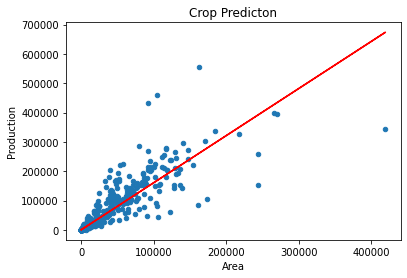

In [474]:
history = model1.fit(Area,Production , epochs=200, batch_size=10, verbose=1, validation_split=0.2)
df1.plot(kind='scatter',
       x='Area',
       y='Production', title='Crop Predicton')


y_pred = model1.predict(Area) #The predicted production based on area

#Plot the linear regression line
plt.plot(Area, y_pred, color='red')


# ***Accuracy Assessment and loss assessment***

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


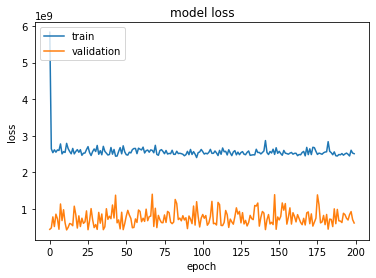

In [475]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Prediction using Sample **data** 

In [383]:
print( "Production {} units:" .format(model.predict([float(input('enter your area '))])))

enter your area 5993.486648
Production [[10098.706]] units:


In [382]:
df.head()

,Yield_kg_,Back Scatter,NDVI,Area
0,170,-8.85088,0.559350,5993.486648
1,100,-13.24120,0.313923,6234.321452
2,170,-7.58420,0.797050,6029.639943
3,40,-9.17053,0.785093,1757.187183
4,55,-9.13041,0.787306,2983.031785


### Creation of new dataframe using pandas

In [476]:
X= df.drop(columns=['Yield_kg_'])
Y = df[['Yield_kg_']]

**Creation of new model**

In [490]:
model = Sequential( [
                     Dense(64,activation=tf.nn.relu,input_shape=(3,)),
                     Dense(128,activation=tf.nn.relu),
                     Dense(64, activation='relu'),
                    Dense(1,activation='linear')
]
)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(opt, loss= 'mean_squared_error', metrics=['mse','mae'])

Model Fitting

Epoch 1/1000
2/2 [==============================] - 1s 171ms/step - loss: 84017.4661 - mse: 84017.4661 - mae: 252.1212 - val_loss: 6281.0542 - val_mse: 6281.0542 - val_mae: 71.7388
Epoch 2/1000
2/2 [==============================] - 0s 35ms/step - loss: 13247.3438 - mse: 13247.3438 - mae: 84.7918 - val_loss: 27507.9004 - val_mse: 27507.9004 - val_mae: 154.4043
Epoch 3/1000
2/2 [==============================] - 0s 32ms/step - loss: 21814.8138 - mse: 21814.8138 - mae: 129.0576 - val_loss: 3381.9766 - val_mse: 3381.9766 - val_mae: 51.3586
Epoch 4/1000
2/2 [==============================] - 0s 34ms/step - loss: 3601.6698 - mse: 3601.6698 - mae: 45.5854 - val_loss: 6639.1016 - val_mse: 6639.1016 - val_mae: 78.7705
Epoch 5/1000
2/2 [==============================] - 0s 36ms/step - loss: 5984.2729 - mse: 5984.2729 - mae: 69.2116 - val_loss: 20728.5410 - val_mse: 20728.5410 - val_mae: 138.4746
Epoch 6/1000
2/2 [==============================] - 0s 40ms/step - loss: 14825.2773 - mse: 14825.277

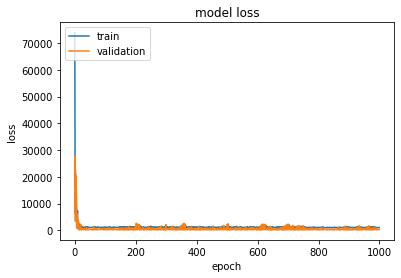

In [491]:
history2 =model.fit(X,Y,epochs=1000,validation_split= 0.1)
print(history2.history.keys())
# "Loss"
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [492]:
df.head()

,Yield_kg_,Back Scatter,NDVI,Area
0,170,-8.85088,0.559350,5993.486648
1,100,-13.24120,0.313923,6234.321452
2,170,-7.58420,0.797050,6029.639943
3,40,-9.17053,0.785093,1757.187183
4,55,-9.13041,0.787306,2983.031785


Data Prediction

In [552]:
data = inputdataset(-9.13041	,0.787306	,2983.031785)
#test_data = np.array([-9.13041	,0.787306	,2983.031785])
#test_data = test_data.reshape(1,3)
print("Yield kg :",model.predict(data, batch_size=1))

Yield kg : [[60.01322]]


Saving a model

In [496]:
model.save('crop_prediction_model.h5')

Loading a model

In [497]:
old_model = keras.models.load_model('crop_prediction_model.h5')

In [551]:
old_model.predict(data)

array([[8.391899]], dtype=float32)